# Wstęp


<font size="3.5">Analizujemy zbiór danych zawierający 1000 rzędów i 10 kolumn. Każdy rząd reprezentuje klienta posiadającego kredyt w banku. Atrybuty kolumn to:<br>
    <b>Age</b> (numeric)<br>
<b>Sex</b> (text: male, female)<br>
<b>Job</b> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account</b> (numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk</b> (Value target - Good or Bad Risk)</font>


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')

In [46]:
df = pd.read_csv('german_credit_data.csv', index_col=0)

In [47]:
#Pierwsze spojrzenie na nasze dane
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [48]:
#sprawdzenie, czy występują brakujące wartości
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


<font size="3.5">Kolumny Savings accounts i Checking account zawierają wartości NaN. Może to świadczyć o tym, że niektóre osoby nie posiadają konta.</font>

In [49]:
#ile jest unikatowych wartości
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

<b>1.</b> Wyróżniono 8 powodów zaciągania kredytów;<br>
<b>2.</b> Zdecydowana większość wartości z kolumny Credit amount jest unikatowa;<br>

In [50]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


<b>1.</b> Tylko cztery kolumny zawierają wartości numeryczne, przy budowaniu modelu wartości niektórych kolumn trzeba będzie zamienić na numeryczne;<br>
<b>2.</b> Średni wiek osób zaciągających kredyt to około 35 lat, najstarszy kredytobiorca ma 75 lat;<br>
<b>4.</b> Większość kredytobiorców to osoby do 45 roku życia (3. kwartyl to 42 lata);<br>
<b>5.</b> Średnia kwota kredytu to około 3271 DM, maksymalna kwota to 18424 DM;<br>
<b>6.</b> Zdecydowana większość kredytów jest zaciągnięta na kwotę poniżej 4000 DM;<br>
<b>6.</b> Średni okres spłaty kredytu to 20.903 miesiąca, kredyty nie są zaciągane na dłużej niż 6 lat.<br>

[]

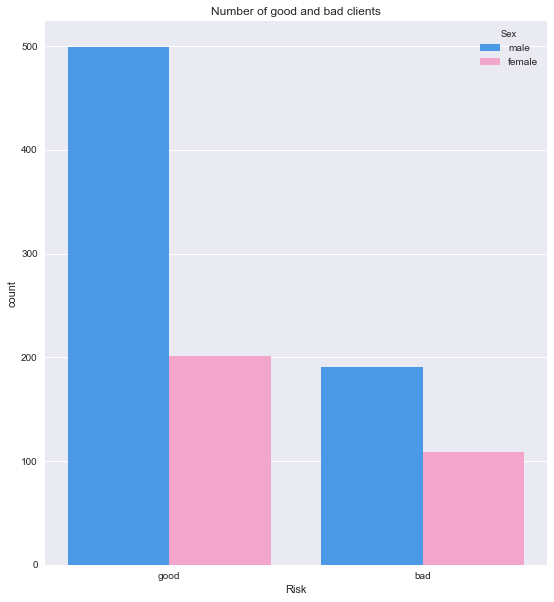

In [51]:
# Prostsza wersja
plt.rcParams.update({'font.size': 20})
figure = plt.figure(figsize=(9, 10))
sns.countplot(data=df,
             x='Risk',
             hue='Sex',
             palette=['#3399FF','#FF99CC'])
plt.title('Number of good and bad clients')

plt.plot()

<b>1.</b> Z wykresu powyżej możemy zaobserwować, że "dobrzy" klienci stanowią 70% wszystkich kredytobiorców, może to mieć wpływ na uczenie się modelu(??), będziemy musieli wziąć to pod uwagę przy budowaniu modelu;<br>
<b>2.</b> Mężczyźni są stosunkowo lepszymi klientami niż kobiety.

1. Tak, może mieć to wpływ. Przy uczeniu modeli więcej opowiem :D
2. Pomysł jak to sprawdzić lepiej niż na oko?

In [52]:
100 * df['Risk'].value_counts(normalize=True) #Nie na oko :D

good    70.0
bad     30.0
Name: Risk, dtype: float64

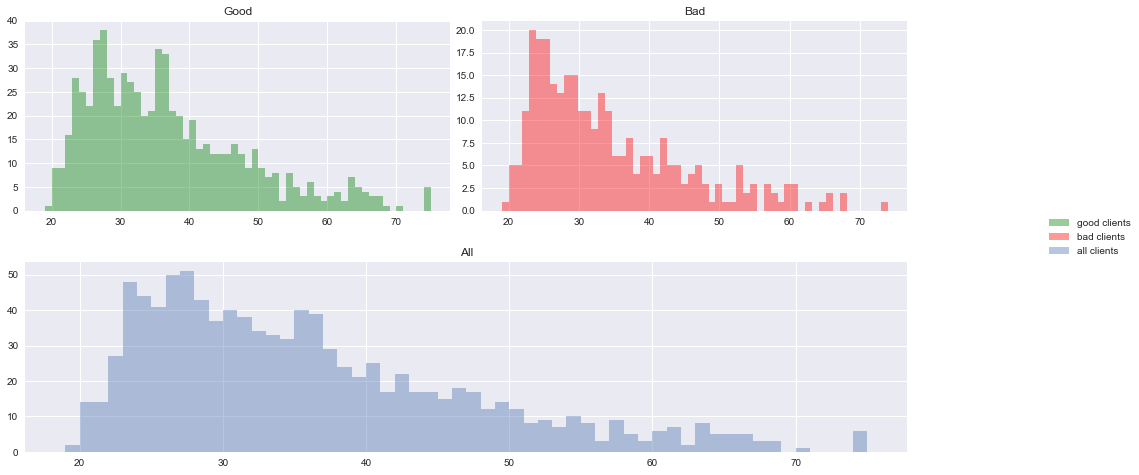

In [53]:
fig = plt.figure(figsize=(16,7))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])

sns.distplot(df[df['Risk']=='good']['Age'],
             kde=False,
             color='green',
             bins=max(df['Age'])-min(df['Age']),
             label='good clients')
plt.xlabel('')
plt.title('Good')

ax2 = fig.add_subplot(gs[0, 1])
sns.distplot(df[df['Risk']=='bad']['Age'],
             kde=False,
             color='red',
             bins=max(df['Age'])-min(df['Age']),
             label='bad clients')
plt.xlabel('')
plt.title('Bad')

ax3 = plt.subplot(gs[1, :])
sns.distplot(df['Age'],
             kde=False,
             bins=max(df['Age'])-min(df['Age']),
             label='all clients')
plt.xlabel('')
plt.title('All')

fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.8) 
plt.show()

<b>1.</b> Potwierdzenie, że większość kredytów biorą ludzie poniżej 45 roku życia<br>
<b>2.</b> Dla wykresu "złych" klientów występuje peak dla klientów w wieku 25-30.

C:\Users\lukas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


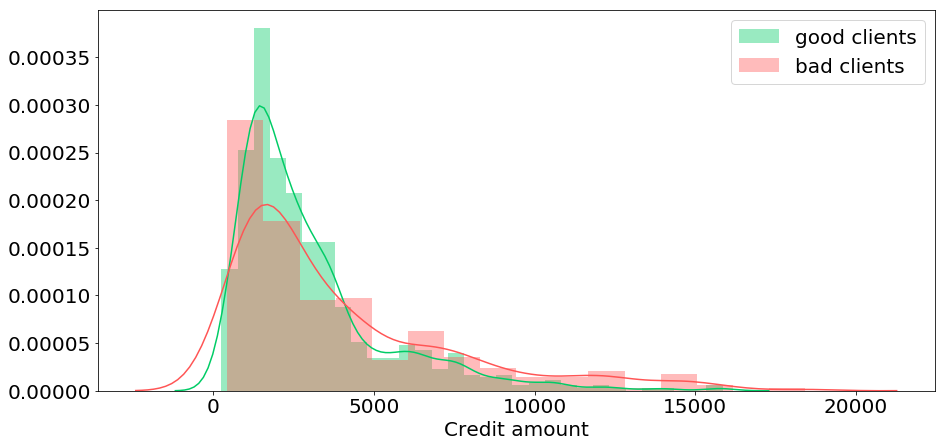

In [11]:
fig = plt.figure(figsize=(15,7))
ax = sns.distplot(df[df['Risk']=='good']['Credit amount'],
                 label='good clients',
                 color='#00CC66')
ax1= sns.distplot(df[df['Risk']=='bad']['Credit amount'],
                 label='bad clients',
                 color='#FF5555')
plt.legend()
plt.show()

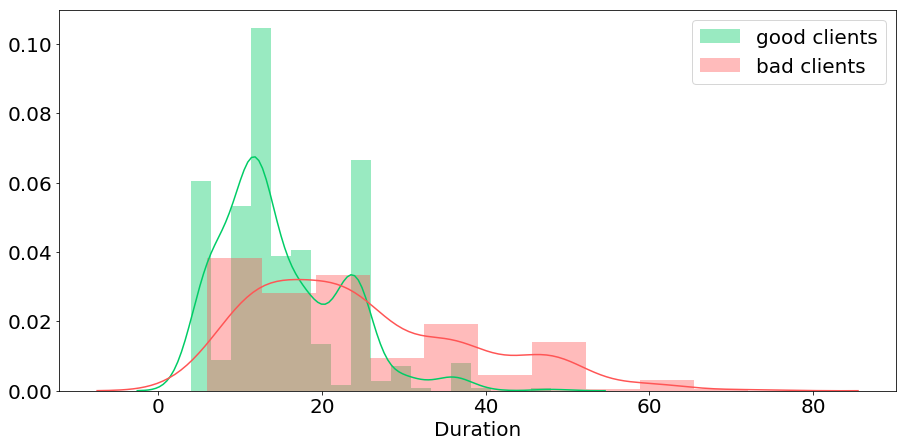

In [37]:
fig = plt.figure(figsize=(15,7))
ax = sns.distplot( df[np.logical_and(df['Risk']=='good',df['Credit amount']<3000)]['Duration'],
                 label='good clients',
                 color='#00CC66')
ax1= sns.distplot(df[df['Risk']=='bad']['Duration'],
                 label='bad clients',
                 color='#FF5555')
plt.legend()
plt.show()

Rozkład 'złych' klientów ma cięższy prawy ogon. 

- Co to dokładniej dla Nas znaczy? 
- Źli klienci chcą zaciągać kredyty na wysokie kwoty; jeśli kwota kredytu jest wysoka istnieje większe ryzyko jego odrzucenia. 

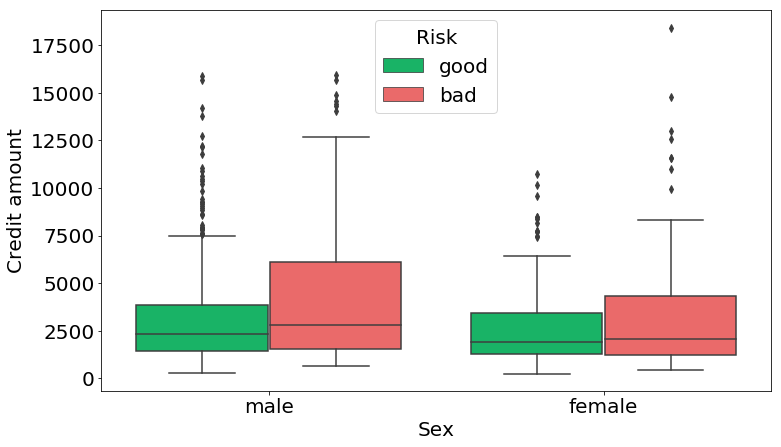

In [13]:
fig = plt.figure(figsize=(12,7))
box = sns.boxplot('Sex', 'Credit amount', 'Risk', data=df, palette=['#00CC66','#FF5555'])
plt.show()

<b>1.</b>Rozstęp międzykwartylowy "dobrych" kredytów jest mniejszy od rozstępu "złych" kredytów - kredyty brane na mniejsze kwoty są częściej kwalifikowane jako dobre (??);<br>
<b>2.</b>Mediany "dobrych" i "złych" kredytów nie różnią się od siebie zbyt wiele;<br>
<b>3.</b>Kredyty brane na więcej niż 10000 są rzadkością<br>

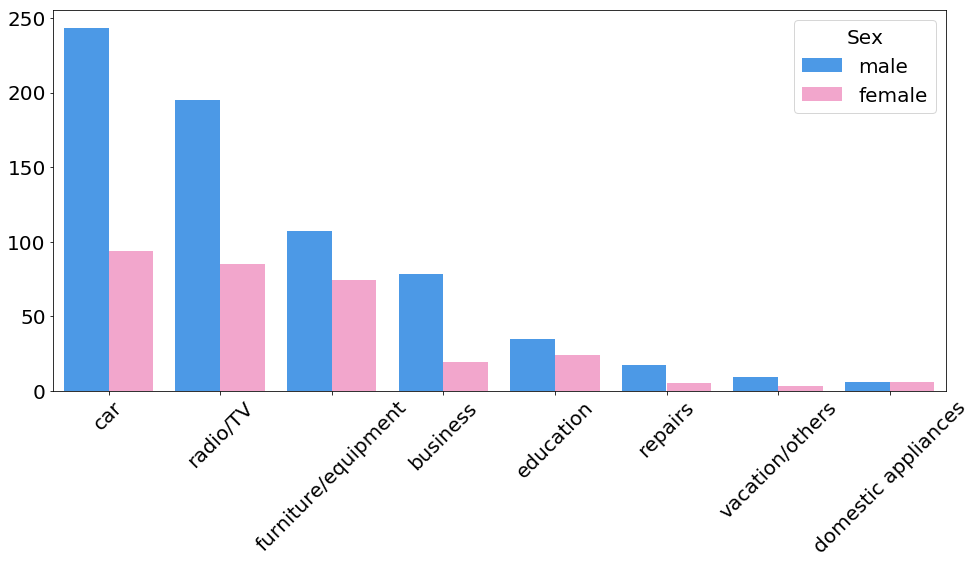

In [14]:
fig = plt.figure(figsize=(16, 7))
ax = sns.countplot(data=df,
             x='Purpose',
             hue='Sex',
             palette=['#3399FF','#FF99CC'],
             order=df.groupby(['Purpose']).count()['Age'].sort_values(ascending=False).reset_index()['Purpose'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()

Większość kredytów branych jest na zakup samochodu (ponad 30%); niektóre 'cele' kredytów występują bardzo rzadko (np. 'vacation/others' oraz 'domestic appliances' - rozkłady danych dla tych celów mogą być niepradziwe (z powodu zbyt małej ilości obserwacji)

In [15]:
df.groupby(['Purpose', 'Risk']).size().unstack(fill_value=0)#Nie na oko :D

Risk,bad,good
Purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


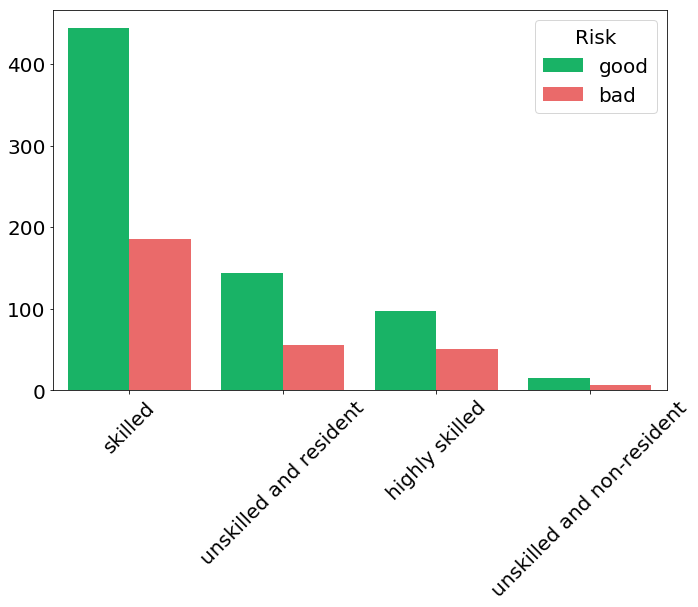

In [16]:
fig = plt.figure(figsize=(11,7))
ax = sns.countplot(data=df,
                  x=df['Job'].map({0:'unskilled and non-resident', 1:'unskilled and resident',2:'skilled',3:'highly skilled'}),
                  hue='Risk',
                  palette=['#00CC66','#FF5555'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.show()

Większość klientów wpada do kategorii 'skilled'.

[]

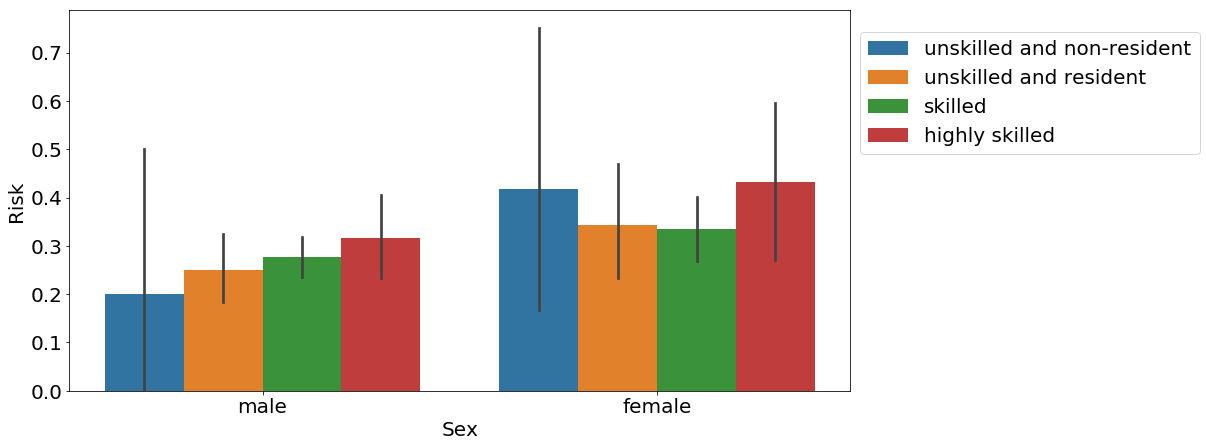

In [17]:
fig = plt.figure(figsize=(14,7))
ax = sns.barplot(data=df,
                x='Sex',
                y=df['Risk'].map({'good':0,'bad':1}),
                 #hue='Job'
                hue=df['Job'].map({0:'unskilled and non-resident', 1:'unskilled and resident',2:'skilled',3:'highly skilled'}),
                hue_order=['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled'])
plt.legend(bbox_to_anchor=(1, 0.97))
plt.plot()

Ryzyko rośnie wraz ze wzrostem kwalifikacji, może to świadczyć, o tym że lepiej wyszkoleni ludzie biorą większe kredyty (dla grupy unskilled and non-resident niepewność jest zbyt duża, aby wyciągać jakiekolwiek wnioski.

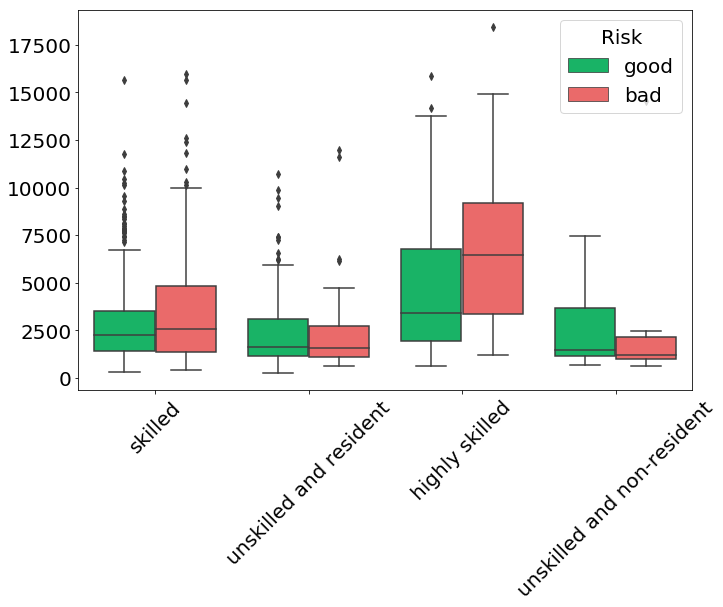

In [18]:
fig = plt.figure(figsize=(11,7))
box = sns.boxplot(data=df,
                 x=df['Job'].map({0:'unskilled and non-resident', 1:'unskilled and resident',2:'skilled',3:'highly skilled'}),
                 y='Credit amount',
                 hue='Risk',
                 palette=['#00CC66','#FF5555'])
box.set_xticklabels(box.get_xticklabels(), rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()

Mediana oraz rozstęp międzykwartylowy klientów 'highly skilled' są większe od innych klientów. Dobrze wyszkoleni klienci mają większą szansę dostać wysoki kredyt. Ogólnie lepiej wyszkoleni pracownicy biorą wyższe kredyty.

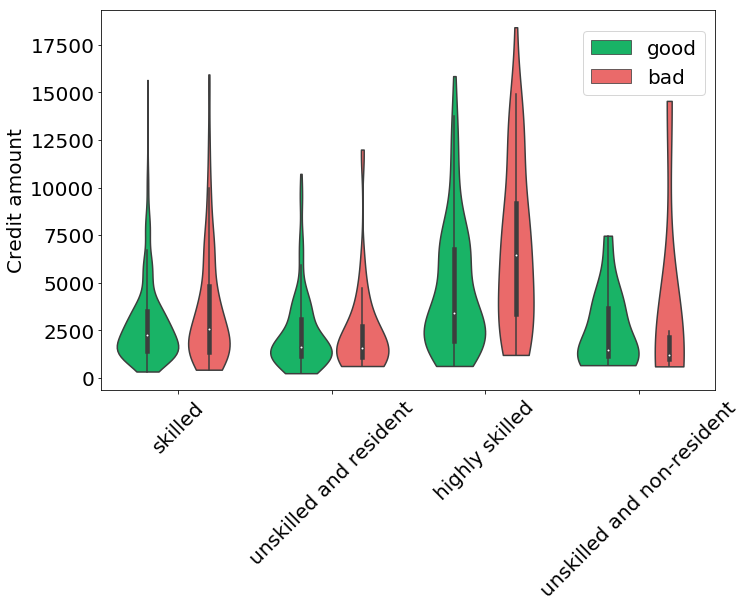

In [19]:
fig = plt.figure(figsize=(11,7))
vio = sns.violinplot(data=df,
                    x=df['Job'].map({0:'unskilled and non-resident', 1:'unskilled and resident',2:'skilled',3:'highly skilled'}),
                    y='Credit amount',
                    hue='Risk',
                    palette=['#00CC66','#FF5555'],
                    cut=0)

vio.set_xticklabels(vio.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1, 0.97))
plt.xlabel('')
plt.show()

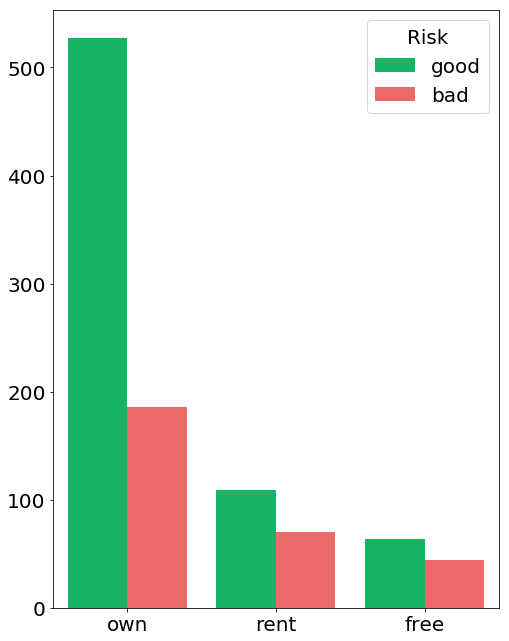

In [20]:
housing = df.groupby(['Housing','Risk']).count()['Age'].rename('Count').reset_index()
fig = plt.figure(figsize=(8,11))
ax = sns.barplot(x='Housing',
                 y='Count',
                 hue='Risk',
                 order=['own','rent','free'],
                 hue_order=['good','bad'],
                 data=housing,
                 palette=['#00CC66','#FF5555'])
plt.xlabel('')
plt.ylabel('')
plt.show()

<b>1.</b> Kredytobiorcy mający własne mieszkanie/dom są stosunkowo lepszymi klientami (ponad połowa dobrych kredytów zaciągniętych przez ludzi z własną nieruchomością);<br>

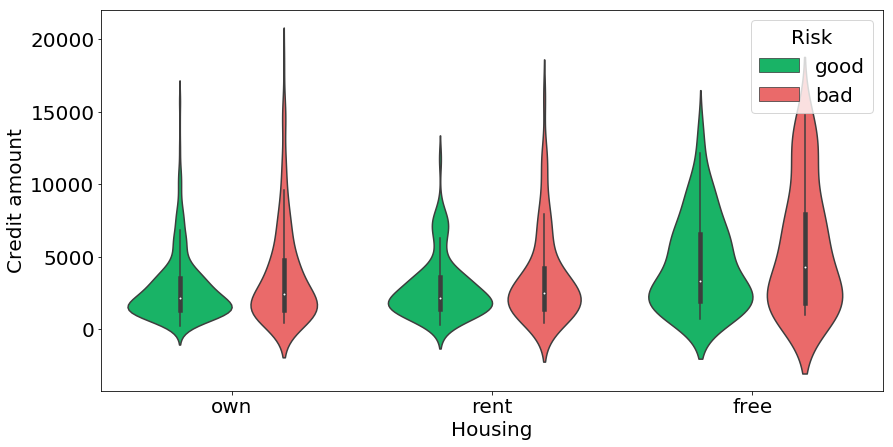

In [21]:
fig = plt.figure(figsize=(14,7))
ax = sns.violinplot('Housing', 'Credit amount', hue='Risk', data=df, order=['own','rent','free'], palette=['#00CC66','#FF5555'])

In [22]:
df['Sex_num'] = df['Sex'].map({'female':0, 'male':1})
labels = ('Young Adult', 'Adult', 'Middle Aged', 'Senior')
intervals = (18, 30, 45, 60, 80)
df['Age_cat'] = pd.cut(df['Age'], intervals, labels=labels)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Sex_num,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,Young Adult
2,49,male,1,own,little,NaN,2096,12,education,good,1,Middle Aged
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,Adult
4,53,male,2,free,little,little,4870,24,car,bad,1,Middle Aged


In [23]:
good_clients_df = df[df['Risk']=='good']
bad_clients_df = df[df['Risk']=='bad']
good_clients_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Sex_num,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1,Senior
2,49,male,1,own,little,NaN,2096,12,education,good,1,Middle Aged
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,Adult
5,35,male,1,free,NaN,NaN,9055,36,education,good,1,Adult
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,1,Middle Aged


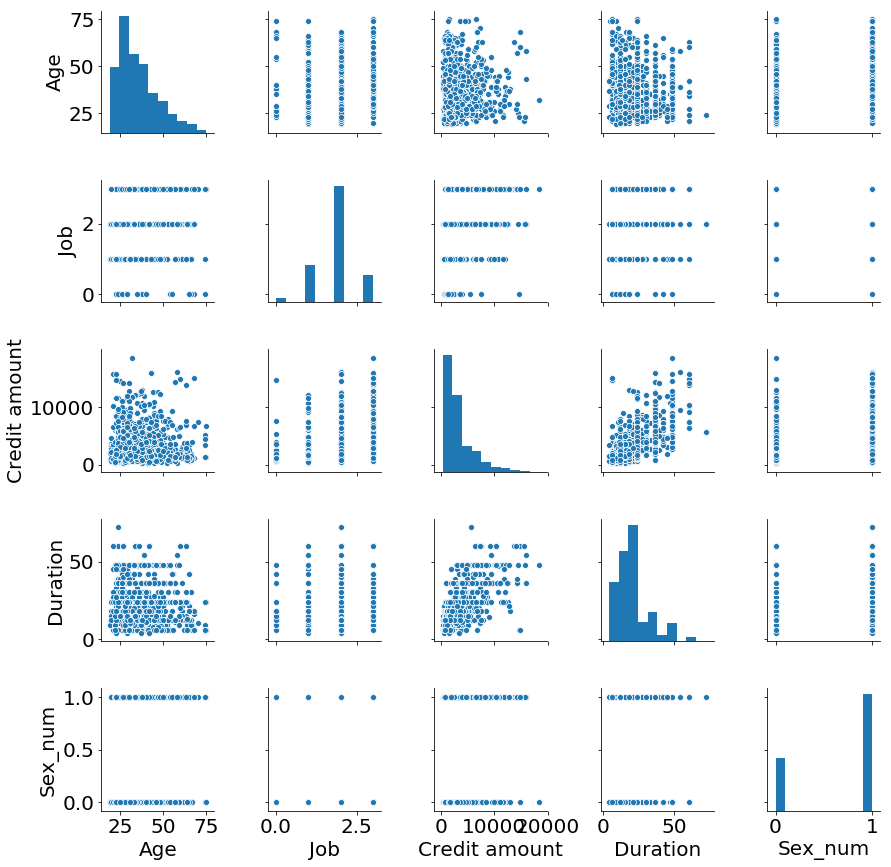

In [24]:
g = sns.pairplot(df)
plt.show()

<b>1.</b>Możemy zaobserwować "zagęszczenie" kredytów zaciąganych na mniejsze kwoty;<br>
<b>2.</b>Występuje zależność kwoty kredytu od jego okresu trwania.<br>

In [25]:
def boxes(x, y, hue, palette, order=None, sizex=10, sizey=7, r=45):
    fig = plt.figure(figsize=(sizex,sizey))
    ax = sns.boxplot(x=x, y=y, hue=hue, order=order, data=df, palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=r)
    plt.xlabel('')
    plt.legend(bbox_to_anchor=(1, 0.97))
    plt.show()
  

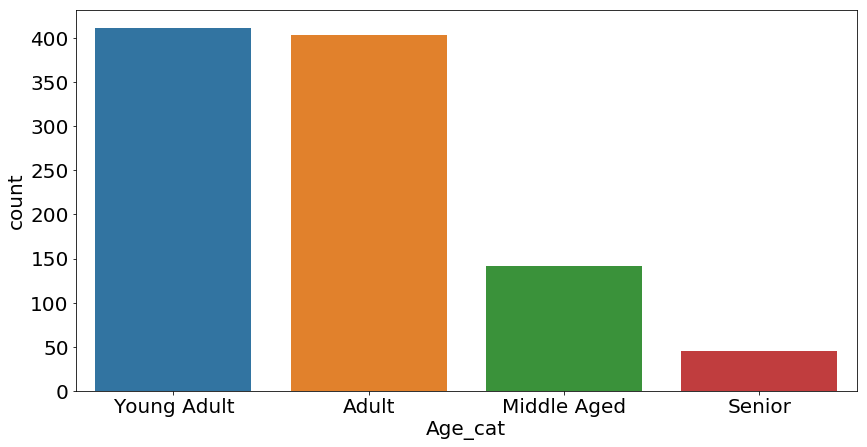

In [26]:
fig = plt.figure(figsize=(14,7))
ax = sns.countplot(x='Age_cat',
                  data=df)

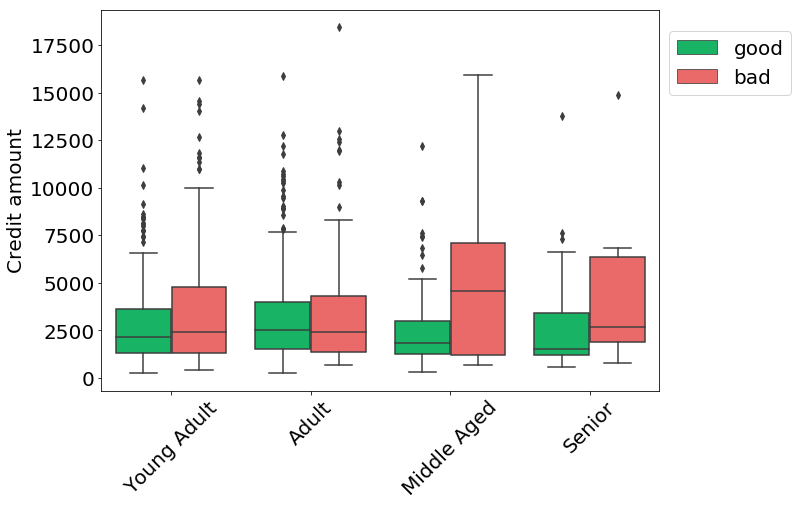

In [27]:
boxes(x='Age_cat',
      y='Credit amount',
      hue='Risk',
      palette=['#00CC66','#FF5555'])

<b>1.</b>Złe kredyty mają ogólnie większy rozstęp międzykwartylowy;<br>
<b>2.</b>Młodsze osoby częściej dostają duże kredyty; u dwóch starszych grup prawie nie ma kredytów większych niż 10000 DM

- Ad 1. Co to znaczy dla Nas? Złe kredyty są zaciągane na wyższe kwoty, występuje więcej dużych obserwacji
- Ad 2. Dlaczego starsze osoby nie biorą dużych kredytów? Na co te grupy biorą kredyty? (Na wykresie poniżej) Starszym osobom mogą nie być przyznawane wysokie kredyty ze względu na wiek (większe ryzyko niespłacenia). 
- Z rysunku poniżej widać że najpopularniejszym celem kredytu jest zakup samochodu; najpopularniejszym celem najmłodzszej grupy jest radio/TV. Co ciekawe (jak dla mnie) na edukację najczęściej zapożycza się grupa 30-45 (Adults), a nie najmłodsza grupa.

[]

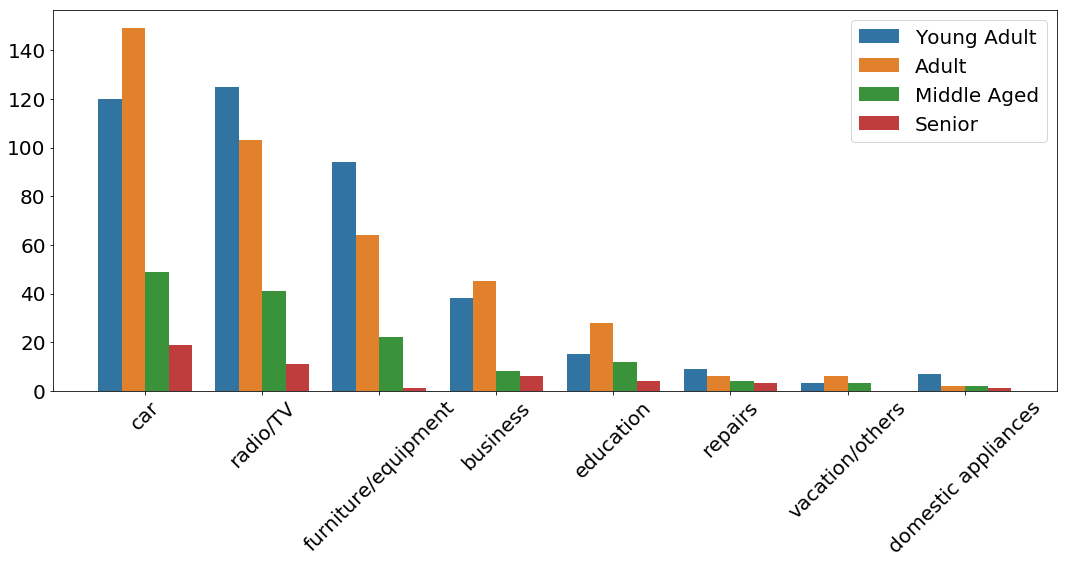

In [28]:
fig = plt.figure(figsize=(18,7))
ax = sns.countplot(x='Purpose',
                  hue='Age_cat',
                  data=df,
                  order=df.groupby(['Purpose']).count()['Age'].sort_values(ascending=False).reset_index()['Purpose'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(loc='upper right')
plt.xlabel('')
plt.ylabel('')
plt.plot()

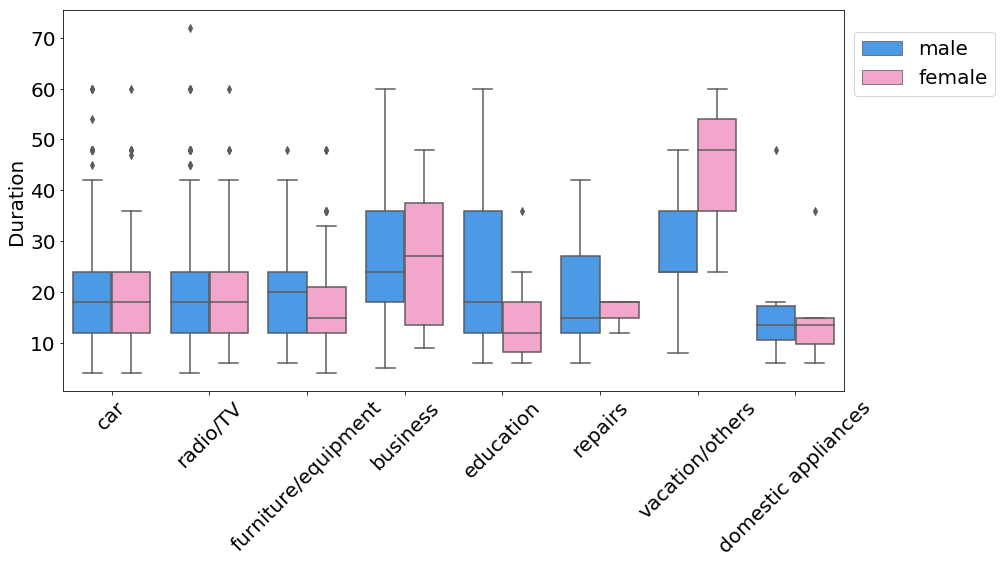

In [29]:
boxes(x="Purpose",
      y="Duration",
      hue="Sex",
      palette=['#3399FF','#FF99CC'],
      sizex=14,
      sizey=7,
      order=df.groupby(['Purpose']).count()['Age'].sort_values(ascending=False).reset_index()['Purpose'])

Kredyty "biznesowe" i na edukację są zaciągane na dłuższy okres niż kredyty na inne cele.

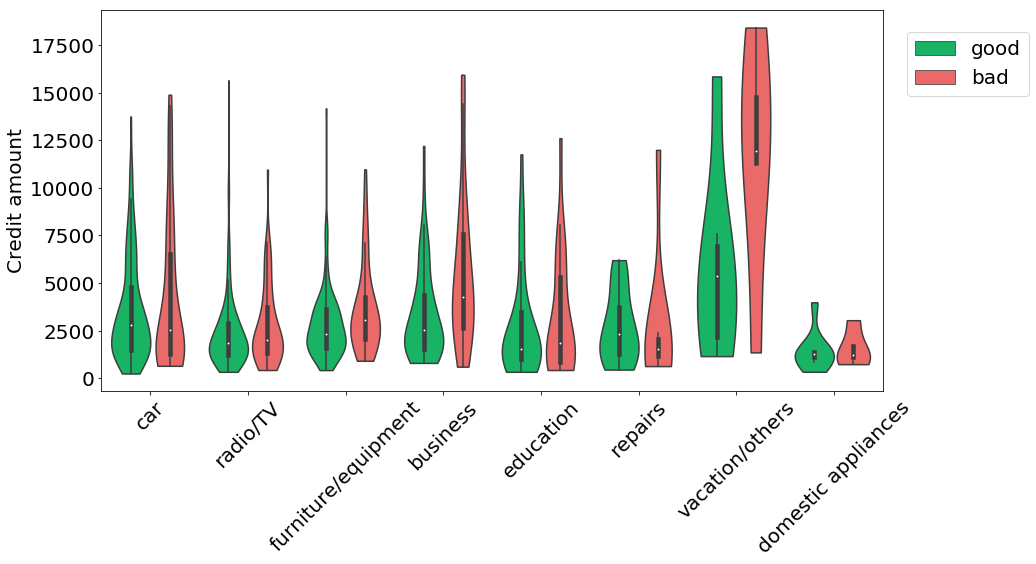

In [30]:
fig = plt.figure(figsize=(14,7))
ax = sns.violinplot("Purpose",
                    "Credit amount",
                    hue="Risk",
                    palette=['#00CC66','#FF5555'],
                    cut=0,
                    order=df.groupby(['Purpose']).count()['Age'].sort_values(ascending=False).reset_index()['Purpose'],
                    data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.2, 0.97))
plt.show()


Dlaczego Credit Amount jest ujemne? (niedokładność estymatora jądrowego dla małej ilości obserwacji w kolumnie (vacation/others), duża rozbieżność Credit amount)

Rozkłady danych zaprezentowanych na wykresie wyżej są zbliżone do siebie kształtem

In [31]:
a=df[df['Purpose']=='vacation/others']
a[a['Risk']=='bad'][['Credit amount','Purpose','Risk']] #tylko 5 obserwacji, duża rozbieżność w Credit amount


,Credit amount,Purpose,Risk
105,11938,vacation/others,bad
374,14782,vacation/others,bad
431,11328,vacation/others,bad
594,1358,vacation/others,bad
915,18424,vacation/others,bad


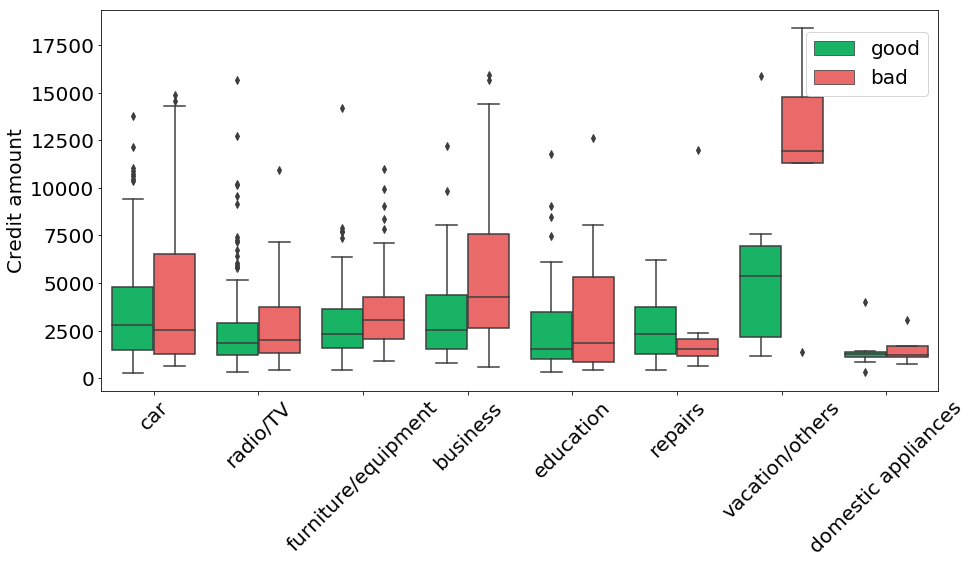

In [32]:
boxes(x="Purpose",
      y="Credit amount",
      hue="Risk",
      palette=['#00CC66','#FF5555'],
      sizex=15,
      sizey=7,
      order=df.groupby(['Purpose']).count()['Age'].sort_values(ascending=False).reset_index()['Purpose']) 
#kolejność na wykresie zgodna z częstością występowania

Złe kredyty mają większy rozstęp międzykwartylowy

- Vacation/Others - wniosek!!>!> kredyty brane na wakacje są widoczne większe, ale biorąc pod uwagę, że w kategorii vacation/others mamy bardzo mało obserwacji, nie musi to wcale być reguła

In [33]:
df['Saving accounts'] = df['Saving accounts'].fillna('no account')

In [34]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Sex_num,Age_cat
0,67,male,2,own,no account,little,1169,6,radio/TV,good,1,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,Young Adult
2,49,male,1,own,little,NaN,2096,12,education,good,1,Middle Aged
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,Adult
4,53,male,2,free,little,little,4870,24,car,bad,1,Middle Aged


[]

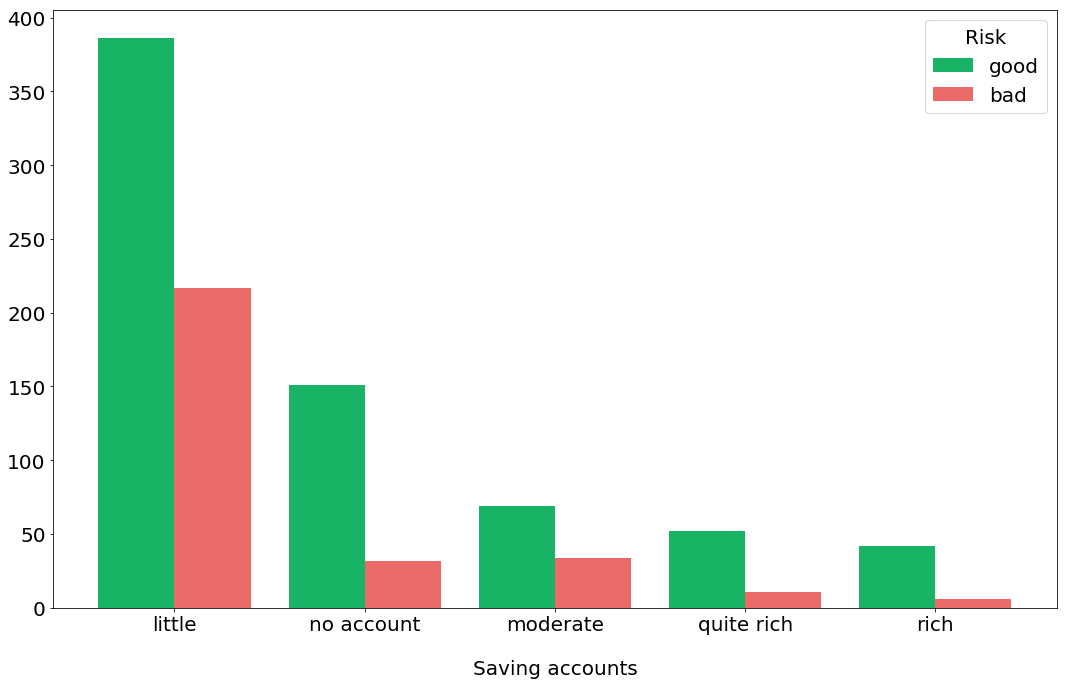

In [35]:
fig = plt.figure(figsize=(18,11))
count = sns.countplot(data=df,
                     x='Saving accounts',
                     hue='Risk',
                     palette=['#00CC66','#FF5555'],
                     order=df.groupby(['Saving accounts']).count()['Age'].sort_values(ascending=False).reset_index()['Saving accounts'])
#count.set_xticklabels(count.get_xticklabels(),rotation=45)
plt.ylabel('')
plt.xlabel('Saving accounts', labelpad=25)
plt.plot()

Większość klientów ma mało oszczędności, ciekawe jest, że kredytobiorcy bez konta stanowią drugą najliczniejszą grupę "dobrych" klientów.

[]

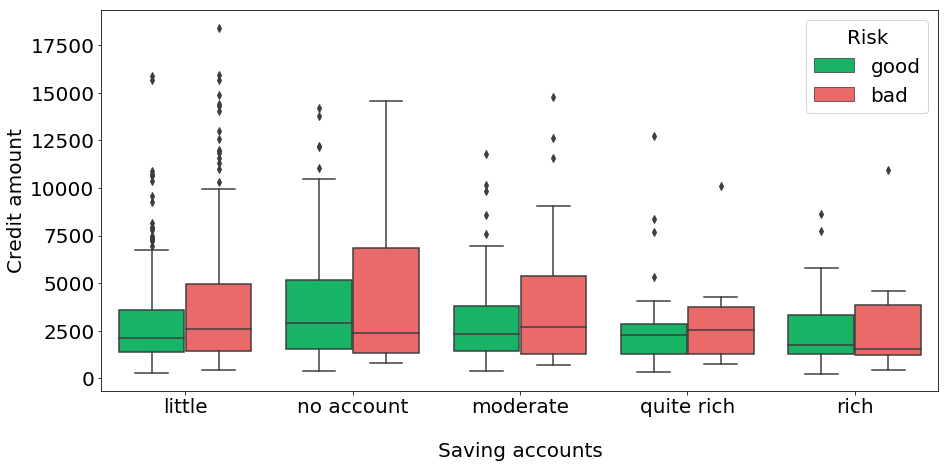

In [36]:
fig = plt.figure(figsize=(15,7))
box = sns.boxplot(data=df,
                 x='Saving accounts',
                 y='Credit amount',
                 hue='Risk',
                 palette=['#00CC66','#FF5555'],
                 order=df.groupby(['Saving accounts']).count()['Age'].sort_values(ascending=False).reset_index()['Saving accounts'])

plt.xlabel('Saving accounts', labelpad=25)
plt.plot()

Bogaci ludzie nie brali wysokich kredytów. Większość kredytów powyżej 10000 wzięli klienci z małymi oszczędnościami (większość to złe kredyty).